# Univariate Resemblance Analysis (URA) Dataset A
In this notebook the univariate resemblance analysis of Dataset A is performed for all STDG approaches.

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home directory of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for univariate resemblance analisys
from univariate_resemblance import basic_stats
from univariate_resemblance import student_t_tests
from univariate_resemblance import mann_whitney_tests
from univariate_resemblance import ks_tests
from univariate_resemblance import chi_squared_tests
from univariate_resemblance import scale_data
from univariate_resemblance import euclidean_distances
from univariate_resemblance import cosine_distances
from univariate_resemblance import js_distances
from univariate_resemblance import wass_distances

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/A_Diabetes_Data_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/A_Diabetes_Data_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/A_Diabetes_Data_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/A_Diabetes_Data_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/A_Diabetes_Data_Synthetic_WGANGP.csv'}
categorical_columns = ['gender','age','admission_type_id','discharge_disposition_id','admission_source_id','max_glu_serum',
                      'A1Cresult','change','diabetesMed','readmitted']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
    data[name] = data[name].iloc[0:16281,:]
data

{'Real':        encounter_id  patient_nbr  gender      age admission_type_id  \
 0          81844290        94788  Female  [70-80)                 1   
 1         396159158    135023315    Male  [50-60)                 1   
 2          31258956     18397782    Male  [80-90)                 1   
 3         210691074     67509558    Male  [80-90)                 1   
 4         104902980     23272362  Female  [70-80)                 1   
 ...             ...          ...     ...      ...               ...   
 16276      52133388     23358699  Female  [60-70)                 5   
 16277     164263770    105269535  Female  [70-80)                 2   
 16278     156443142     59413167    Male  [70-80)                 2   
 16279     179178864     23345838    Male  [40-50)                 1   
 16280     203162886     68480892  Female  [60-70)                 1   
 
       discharge_disposition_id admission_source_id  time_in_hospital  \
 0                            1                   7  

## 2. Basic statistics comparisson
In this part the basic statistics of each attribute for each dataset are computed.
- means and stds of all variables are compared.

In [5]:
df_means_std = pd.DataFrame(index=data['Real'].select_dtypes(include=['float64','int64']).columns.tolist())
for name in DATA_TYPES :
    means_stds = basic_stats(data[name])
    means_stds.columns = [name]
    df_means_std = pd.concat([df_means_std,means_stds], axis=1)
df_means_std

,Real,GM,SDV,CTGAN,WGANGP
encounter_id,166361567.93 ± 103125547.25,165720789.31 ± 104401159.12,164964489.76 ± 102972578.01,163682106.07 ± 92283819.47,162825773.34 ± 43787461.5
patient_nbr,54253692.19 ± 38573511.56,54308369.68 ± 38872474.82,54152353.01 ± 38670530.98,57541431.17 ± 38679099.2,45912074.71 ± 29316212.86
time_in_hospital,4.4 ± 3.01,3.91 ± 3.04,4.41 ± 3.01,4.15 ± 3.03,3.04 ± 1.64
num_lab_procedures,42.87 ± 19.81,42.6 ± 19.83,43.19 ± 19.7,41.6 ± 18.45,40.54 ± 12.32
num_procedures,1.35 ± 1.72,1.06 ± 1.56,1.35 ± 1.74,1.17 ± 1.42,0.73 ± 0.63
num_medications,16.01 ± 8.04,15.55 ± 8.2,16.02 ± 8.16,15.99 ± 8.74,15.64 ± 1.94
number_outpatient,0.36 ± 1.22,0.3 ± 1.16,0.39 ± 1.29,0.15 ± 0.65,0.53 ± 0.59
number_emergency,0.21 ± 1.05,0.15 ± 1.01,0.19 ± 0.98,0.07 ± 0.35,0.51 ± 0.56
number_inpatient,0.64 ± 1.27,0.46 ± 1.14,0.63 ± 1.29,0.62 ± 1.06,0.87 ± 0.64
number_diagnoses,7.45 ± 1.91,6.93 ± 1.98,7.42 ± 1.97,6.9 ± 1.98,6.67 ± 0.88


## 3. Statistical Tests
In this part some statistical tests are performed to compare variables from real and synthetic data.

### 3.1. Sudent t-test
- null hypothesis (p > 0.05): Means of real and synthetic feature are the same.
- alternative hypothesis (p < 0.05): Mean of real and synthetic feature are significantly different.

In [6]:
p_values_student = dict()
for name in SYNTHESIZERS :
    p_values_student[name] = student_t_tests(data['Real'], data[name])
df_student_test = pd.DataFrame(data=p_values_student, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns)
df_student_test.to_csv('UNIVARIATE RESEMBLANCE RESULTS/student_t_tests.csv')
df_student_test

,GM,SDV,CTGAN,WGANGP
encounter_id,5.7742e-01,0.2213,1.3496e-02,5.6653e-05
patient_nbr,8.9863e-01,0.8129,1.6403e-14,3.4086e-106
time_in_hospital,6.4362e-50,0.8584,6.7970e-14,0.0000e+00
num_lab_procedures,2.2468e-01,0.1426,1.9104e-09,5.4752e-37
num_procedures,4.2528e-55,0.9159,2.2244e-24,0.0000e+00
num_medications,3.3930e-07,0.8896,8.5756e-01,1.6033e-08
number_outpatient,1.3732e-06,0.0237,3.3131e-86,2.3146e-55
number_emergency,1.3186e-07,0.2383,1.1832e-59,6.4520e-225
number_inpatient,1.0274e-37,0.7104,3.4119e-01,1.0561e-93
number_diagnoses,9.0542e-128,0.1258,3.7295e-139,0.0000e+00


### 3.2. Mann-Whitney U-Test
- null hypothesis (p > 0.05): Real feature and synthetic feature come from the same population.
- alternative hypothesis (p < 0.05): Real feature and synthetic feature does not come from the same population.

In [7]:
p_values_mann_whitnney = dict()
for name in SYNTHESIZERS :
    p_values_mann_whitnney[name] = mann_whitney_tests(data['Real'], data[name])
df_mann_whitney = pd.DataFrame(data=p_values_mann_whitnney, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns)
df_mann_whitney.to_csv('UNIVARIATE RESEMBLANCE RESULTS/mann_whitnney_tests.csv')
df_mann_whitney

,GM,SDV,CTGAN,WGANGP
encounter_id,2.2165e-01,2.2578e-08,2.1232e-01,8.1186e-26
patient_nbr,4.6890e-01,2.2901e-04,6.6602e-20,3.7449e-54
time_in_hospital,9.8719e-70,1.4978e-24,5.0412e-21,0.0000e+00
num_lab_procedures,1.2445e-01,1.4798e-01,2.7479e-18,3.3761e-111
num_procedures,1.2057e-69,1.5196e-31,3.0222e-04,3.6309e-55
num_medications,6.3798e-11,9.4557e-14,2.3851e-05,5.5881e-41
number_outpatient,1.2077e-22,5.3495e-53,7.0772e-182,0.0000e+00
number_emergency,1.5244e-33,1.0856e-18,3.3655e-136,0.0000e+00
number_inpatient,1.7877e-77,4.3072e-41,5.9579e-03,0.0000e+00
number_diagnoses,7.3286e-217,1.2449e-25,5.1813e-232,0.0000e+00


### 3.3. Kolmogorov-Smirnov Test
- null hypothesis (p > 0.05): Real feature and synthetic feature distributions are equal.
- alternative hypothesis (p < 0.05): Real feature and synthetic feature distributions are not equal.

In [8]:
p_values_ks = dict()
for name in SYNTHESIZERS :
    p_values_ks[name] = ks_tests(data['Real'], data[name])
df_ks = pd.DataFrame(data=p_values_ks, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns)
df_ks.to_csv('UNIVARIATE RESEMBLANCE RESULTS/ks_tests.csv')
df_ks

,GM,SDV,CTGAN,WGANGP
encounter_id,1.7163e-02,1.8527e-43,1.9614e-17,0.0000e+00
patient_nbr,3.9433e-12,1.3117e-70,2.1660e-43,1.9213e-274
time_in_hospital,1.2132e-53,1.0250e-84,3.2278e-46,0.0000e+00
num_lab_procedures,1.0643e-03,3.3454e-10,9.1360e-30,7.9848e-308
num_procedures,1.7658e-71,1.3917e-148,1.6322e-27,0.0000e+00
num_medications,1.8662e-07,2.1699e-38,4.7558e-41,0.0000e+00
number_outpatient,3.9698e-11,0.0000e+00,1.4829e-75,0.0000e+00
number_emergency,2.6857e-11,0.0000e+00,2.3661e-39,0.0000e+00
number_inpatient,2.4937e-65,1.2723e-312,3.2494e-08,0.0000e+00
number_diagnoses,0.0000e+00,1.2281e-295,0.0000e+00,0.0000e+00


### 3.4. Join all p-values of all tests in one unique dataset

In [9]:
tests_all_data = np.round(np.concatenate([df_student_test.values, df_mann_whitney.values, df_ks.values] , axis=1),4)
#join results of all tests
df_tests_all = pd.DataFrame(data=tests_all_data, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns,
                columns=['GM_S','SDV_S','CTGAN_S','NewGAN_S','GM_M','SDV_M','CTGAN_M','NewGAN_M','GM_K','SDV_K','CTGAN_K','NewGAN_K'])
df_tests_all.to_csv('UNIVARIATE RESEMBLANCE RESULTS/STATISTICAL_TESTS_ALL.csv')
df_tests_all

,GM_S,SDV_S,CTGAN_S,NewGAN_S,GM_M,SDV_M,CTGAN_M,NewGAN_M,GM_K,SDV_K,CTGAN_K,NewGAN_K
encounter_id,0.5774,0.2213,0.0135,0.0001,0.2216,0.0000,0.2123,0.0,0.0172,0.0,0.0,0.0
patient_nbr,0.8986,0.8129,0.0000,0.0000,0.4689,0.0002,0.0000,0.0,0.0000,0.0,0.0,0.0
time_in_hospital,0.0000,0.8584,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0
num_lab_procedures,0.2247,0.1426,0.0000,0.0000,0.1244,0.1480,0.0000,0.0,0.0011,0.0,0.0,0.0
num_procedures,0.0000,0.9159,0.0000,0.0000,0.0000,0.0000,0.0003,0.0,0.0000,0.0,0.0,0.0
num_medications,0.0000,0.8896,0.8576,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0
number_outpatient,0.0000,0.0237,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0
number_emergency,0.0000,0.2383,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0
number_inpatient,0.0000,0.7104,0.3412,0.0000,0.0000,0.0000,0.0060,0.0,0.0000,0.0,0.0,0.0
number_diagnoses,0.0000,0.1258,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0


### 3.4. Chi-Squared Test (categorical variables)
- null hypothesis (p > 0.05): There is not statistical relationship between real and synthetic feature.
- alternative hypothesis (p < 0.05): There is a statistical relationship between real and synthetic feature.

In [10]:
p_values_chi = dict()
for name in SYNTHESIZERS :
    p_values_chi[name] = chi_squared_tests(data['Real'], data[name])
df_chi = pd.DataFrame(data=p_values_chi, index=(data['Real'].select_dtypes(include=['category'])).columns)
df_chi.to_csv('UNIVARIATE RESEMBLANCE RESULTS/chi_squared_tests.csv')
df_chi

,GM,SDV,CTGAN,WGANGP
gender,0.3828,0.3564,0.9727,0.5271
age,0.2632,0.9581,0.0898,0.0472
admission_type_id,0.9992,0.9712,0.0161,0.6461
discharge_disposition_id,1.0000,1.0000,0.9994,1.0000
admission_source_id,0.9999,0.8548,0.9999,0.6751
max_glu_serum,0.4217,1.0000,0.5409,0.8204
A1Cresult,0.8696,0.2375,0.0556,0.7376
change,0.5666,0.4747,0.2189,0.1979
diabetesMed,0.4498,0.2010,0.0912,0.9553
readmitted,0.1482,0.4557,0.0584,0.5745


## 4. Distances calculation for each numerical variable
In this part some distance metrics are calculated for each numerical variable. First the data is scaled between 0 and 1.

In [11]:
#Scale the data
num_cols = (data['Real'].select_dtypes(include=['int64','float64'])).columns
scaled_data = dict()
for name in DATA_TYPES :
    scaled_data[name] = scale_data(data[name][num_cols])
scaled_data

{'Real':        encounter_id  patient_nbr  time_in_hospital  num_lab_procedures  \
 0            0.1843       0.0005            0.2308              0.3917   
 1            0.8926       0.7127            0.0000              0.3417   
 2            0.0703       0.0971            0.2308              0.3583   
 3            0.4746       0.3564            0.1538              0.4417   
 4            0.2363       0.1228            0.7692              0.2833   
 ...             ...          ...               ...                 ...   
 16276        0.1174       0.1233            0.1538              0.1500   
 16277        0.3700       0.5557            0.1538              0.4500   
 16278        0.3524       0.3136            0.4615              0.3917   
 16279        0.4036       0.1232            0.1538              0.3250   
 16280        0.4577       0.3615            0.7692              0.6333   
 
        num_procedures  num_medications  number_outpatient  number_emergency  \
 0        

### 4.1. Euclidean distances
Square root of the sum of squares of differences between real feature and synthetic feature

In [12]:
euclidean_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    euclidean_dists[name] = euclidean_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_euclidean_dists = pd.DataFrame(data=euclidean_dists, index=num_cols)
df_euclidean_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/euclidean_distances.csv')
df_euclidean_dists

,GM,SDV,CTGAN,WGANGP
encounter_id,40.1297,37.8283,39.1000,36.0343
patient_nbr,35.6445,42.8593,35.6495,33.4378
time_in_hospital,40.5462,45.2767,40.6851,38.8738
num_lab_procedures,32.1076,31.5786,30.0184,36.1919
num_procedures,49.9661,49.4315,47.4066,45.3321
num_medications,20.6411,39.1500,20.3051,70.9805
number_outpatient,6.1911,63.7629,17.2862,49.7367
number_emergency,2.6785,60.5823,15.0025,47.9027
number_inpatient,13.1453,64.0969,25.9879,65.6621
number_diagnoses,22.6902,25.6772,52.9607,32.4769


### 4.2. Cosine distances
Related with cosine similarity; the dot product of the two vectors divided by the product of the two vectors' lengths.

In [13]:
cosine_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    cosine_dists[name] = cosine_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_cosine_dists = pd.DataFrame(data=cosine_dists, index=num_cols)
df_cosine_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/cosine_distances.csv')
df_cosine_dists

,GM,SDV,CTGAN,WGANGP
encounter_id,0.2560,0.1770,0.2581,0.2315
patient_nbr,0.2958,0.2062,0.3137,0.2960
time_in_hospital,0.4086,0.2764,0.3946,0.3408
num_lab_procedures,0.1688,0.1266,0.1705,0.2621
num_procedures,0.6582,0.4057,0.6043,0.5339
num_medications,0.2233,0.1441,0.2257,0.1300
number_outpatient,0.9166,0.7287,0.9341,0.8153
number_emergency,0.9780,0.8126,0.9662,0.8709
number_inpatient,0.8364,0.5699,0.7745,0.6464
number_diagnoses,0.0783,0.0662,0.0910,0.1520


### 4.3. Jensen-Shannon distances
Measures the similarity between two probability distributions.

In [14]:
js_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    js_dists[name] = js_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_js_dists = pd.DataFrame(data=js_dists, index=num_cols)
df_js_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/js_distances.csv')
df_js_dists

,GM,SDV,CTGAN,WGANGP
encounter_id,0.0503,0.0440,0.0484,0.0423
patient_nbr,0.0350,0.0339,0.0338,0.0337
time_in_hospital,0.0444,0.0397,0.0454,0.0428
num_lab_procedures,0.0322,0.0294,0.0299,0.0399
num_procedures,0.0541,0.0459,0.0507,0.0466
num_medications,0.0168,0.0228,0.0170,0.0310
number_outpatient,0.0034,0.0250,0.0154,0.0375
number_emergency,0.0021,0.0228,0.0138,0.0326
number_inpatient,0.0073,0.0269,0.0184,0.0529
number_diagnoses,0.0243,0.0286,0.0591,0.0386


### 4.4. Wasserstein distances
Minimum amount of work required to transform a vector into another vector.

In [15]:
was_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    was_dists[name] = wass_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_was_dists = pd.DataFrame(data=was_dists, index=num_cols)
df_was_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/wass_distances.csv')
df_was_dists

,GM,SDV,CTGAN,WGANGP
encounter_id,0.0201,0.1565,0.0323,0.1035
patient_nbr,0.0360,0.2383,0.0188,0.0634
time_in_hospital,0.0364,0.2472,0.0505,0.0869
num_lab_procedures,0.0672,0.1333,0.0314,0.0940
num_procedures,0.0475,0.2753,0.0309,0.1100
num_medications,0.0070,0.2604,0.0131,0.5322
number_outpatient,0.0023,0.4774,0.0260,0.2528
number_emergency,0.0010,0.4535,0.0212,0.2511
number_inpatient,0.0140,0.4748,0.0641,0.3933
number_diagnoses,0.0310,0.0969,0.3114,0.1101


### 4.5. Join all distances in an unique dataframe

In [16]:
distances_all_data = np.round(np.concatenate([df_cosine_dists.values, df_js_dists.values, df_was_dists.values] , axis=1),4)
#join results of all tests
df_dists_all = pd.DataFrame(data=distances_all_data, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns,
                columns=['GM_C','SDV_C','CTGAN_C','WGANGP_C','GM_J','SDV_J','CTGAN_J','WGANGP_J','GM_W','SDV_W','CTGAN_W','WGANGP_W'])
df_dists_all.to_csv('UNIVARIATE RESEMBLANCE RESULTS/DISTANCES_ALL.csv')
df_dists_all

,GM_C,SDV_C,CTGAN_C,WGANGP_C,GM_J,SDV_J,CTGAN_J,WGANGP_J,GM_W,SDV_W,CTGAN_W,WGANGP_W
encounter_id,0.2560,0.1770,0.2581,0.2315,0.0503,0.0440,0.0484,0.0423,0.0201,0.1565,0.0323,0.1035
patient_nbr,0.2958,0.2062,0.3137,0.2960,0.0350,0.0339,0.0338,0.0337,0.0360,0.2383,0.0188,0.0634
time_in_hospital,0.4086,0.2764,0.3946,0.3408,0.0444,0.0397,0.0454,0.0428,0.0364,0.2472,0.0505,0.0869
num_lab_procedures,0.1688,0.1266,0.1705,0.2621,0.0322,0.0294,0.0299,0.0399,0.0672,0.1333,0.0314,0.0940
num_procedures,0.6582,0.4057,0.6043,0.5339,0.0541,0.0459,0.0507,0.0466,0.0475,0.2753,0.0309,0.1100
num_medications,0.2233,0.1441,0.2257,0.1300,0.0168,0.0228,0.0170,0.0310,0.0070,0.2604,0.0131,0.5322
number_outpatient,0.9166,0.7287,0.9341,0.8153,0.0034,0.0250,0.0154,0.0375,0.0023,0.4774,0.0260,0.2528
number_emergency,0.9780,0.8126,0.9662,0.8709,0.0021,0.0228,0.0138,0.0326,0.0010,0.4535,0.0212,0.2511
number_inpatient,0.8364,0.5699,0.7745,0.6464,0.0073,0.0269,0.0184,0.0529,0.0140,0.4748,0.0641,0.3933
number_diagnoses,0.0783,0.0662,0.0910,0.1520,0.0243,0.0286,0.0591,0.0386,0.0310,0.0969,0.3114,0.1101


## 5. Boxplots comparisson
In this part boxplots of each variable are plotted to analyse the statistical properties of each variable.

In [17]:
columns = (data['Real'].select_dtypes(include=['float64','int64'])).columns
len(columns)

10

In [18]:
boxplots_data = dict()
for c in columns :
    boxplots_data[c] = data['Real'][c]
    for name in SYNTHESIZERS :
        boxplots_data[c] = np.column_stack((boxplots_data[c], data[name][c]))

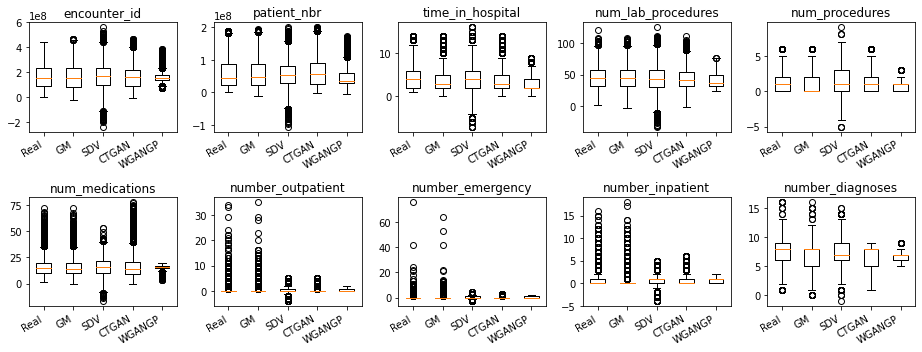

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(13,5))
idx = {0:[0,0], 1:[0,1], 2:[0,2], 3:[0,3], 4:[0,4], 5:[1,0], 6:[1,1], 7:[1,2], 8:[1,3], 9:[1,4]}

for i in range(0,len(columns)) :
    axs[idx[i][0], idx[i][1]].boxplot(boxplots_data[columns[i]])
    axs[idx[i][0], idx[i][1]].set_title(columns[i])
    axs[idx[i][0], idx[i][1]].set_xticklabels(DATA_TYPES)

for ax in axs.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, ha="right")
#fig.suptitle('Boxplots of Dataset E - Indian Liver Patient', fontsize=18)
fig.tight_layout()
fig.savefig('UNIVARIATE RESEMBLANCE RESULTS/BOXPLOTS.svg', bbox_inches='tight')

## 6. Frequency distributions comparisson
In this part histograms of each variable are plotted to compare the frequency distributions.

In [20]:
columns = data['Real'].columns
len(columns)

20

In [21]:
hists_data = dict()
for c in columns :
    hists_data[c] = data['Real'][c]
    for name in SYNTHESIZERS :
        hists_data[c] = np.column_stack((hists_data[c], data[name][c]))

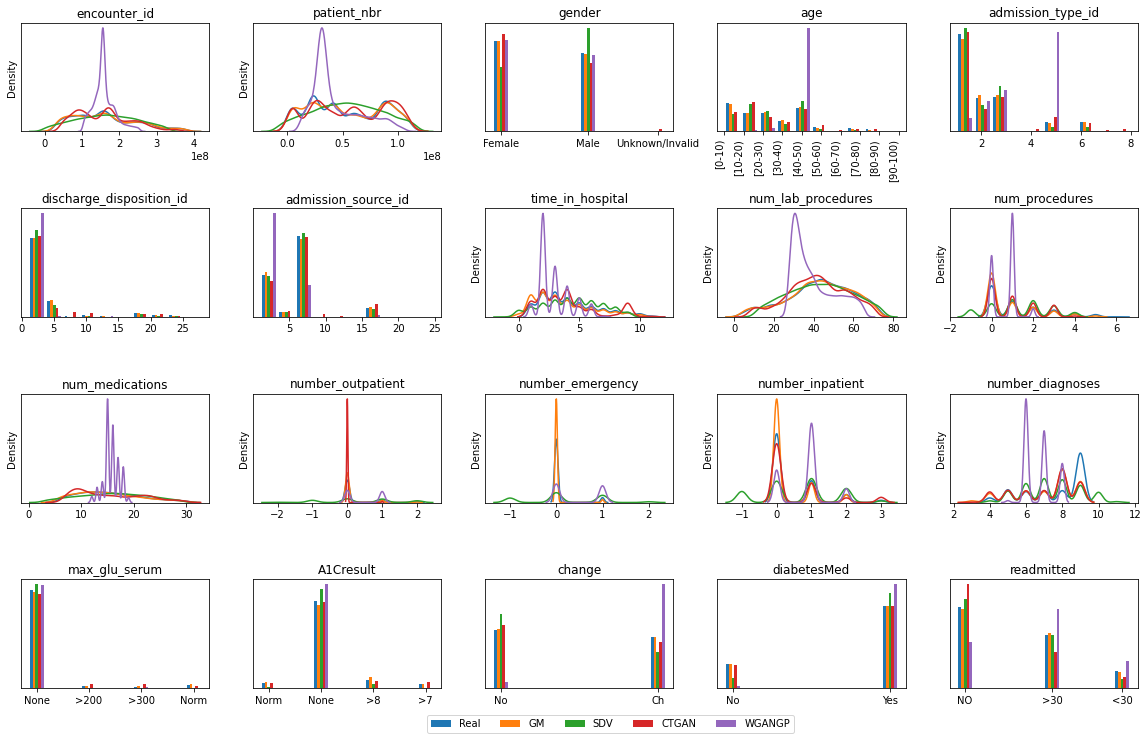

In [23]:
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(16,10))
idx = {0:[0,0], 1:[0,1], 2:[0,2], 3:[0,3], 4:[0,4], 5:[1,0], 6:[1,1], 7:[1,2], 8:[1,3], 9:[1,4], 10:[2,0], 11:[2,1], 12:[2,2],
      13:[2,3], 14:[2,4], 15:[3,0], 16:[3,1], 17:[3,2], 18:[3,3], 19:[3,4]}

for i in range(0,len(columns)):
    ax = axs[idx[i][0], idx[i][1]]
    ax.set_title(columns[i])
    
    if i in [0,1,7,8,9,10,11,12,13,14]:
        arr = hists_data[columns[i]]
        for col in range(arr.shape[1]):
            arr_col = np.sort(arr[:, col])
            sns.distplot(arr_col[int(0.05 * len(arr_col)) : int(0.95 * len(arr_col))], hist=False, norm_hist=False, ax=ax)
    else:
        ax.hist(hists_data[columns[i]], density=False, histtype='bar', label=DATA_TYPES, align='mid')
        
        if columns[i] in ['gender','readmitted'] :
            ax.set_xticks([0.1, 1.1, 1.9])
            #ax.set_xticklabels([1,2,3,4])
            
        elif columns[i] in ['age'] :
            ax.set_xticklabels(data['Real']['age'].cat.categories.tolist(), rotation = 90, ha="right")
            
        elif columns[i] in ['change','diabetesMed'] :
            ax.set_xticks([0.05, 0.95])
        
        elif columns[i] in ['max_glu_serum','A1Cresult'] :
            ax.set_xticks([0.15, 1.05, 1.95, 2.85])
     
    ax.set_yticks([])
    

fig.tight_layout()
fig.savefig('UNIVARIATE RESEMBLANCE RESULTS/HISTOGRAMS.png')
axs[idx[i][0], idx[i][1]].legend(ncol=5, bbox_to_anchor=(-0.8,-0.2))

# fig.subplots_adjust(top=0.75)
fig.savefig('UNIVARIATE RESEMBLANCE RESULTS/HISTOGRAMS.svg', bbox_inches='tight')